# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

## Objective:

Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

# Part 1: Analyzing Best-Seller Trends Across Product Categories

## Objective:

Understand the relationship between product categories and their best-seller status.y?

### 1. Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

In [1]:
# But first things first

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
data

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
df = data.copy()

In [6]:
cross_cat_best = pd.crosstab(df['category'], df['isBestSeller'])
cross_cat_best

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Are there categories where being a best-seller is more prevalent?

_Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order_

In [8]:
proportion_best_seller = cross_cat_best[True] / (cross_cat_best[True] + cross_cat_best[False])
proportion_best_seller

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

In [9]:
proportion_best_seller = proportion_best_seller.sort_values(ascending=False)
proportion_best_seller

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

In [12]:
print(proportion_best_seller.head(5))

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
dtype: float64


Yes, there are categories where being a best-seller is more prevalent. The top 5 are: Grocery, Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accessories and Power & Hand Tools.

### 2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [21]:
_, chi2_pvalue, _, _  = chi2_contingency(cross_cat_best)

In [23]:
float(chi2_pvalue) < 0.05

True

The best-seller distribution is not independent from the product category.
Now, let's see how strong is the association between the two:

Compute Cramér's V to understand the strength of association between best-seller status and category

In [27]:
from scipy.stats.contingency import association

In [29]:
round(association(cross_cat_best, method='cramer'),4)

0.1223

The Cramer's V, that we just calculated ranges from 0 to 1, 1 being the strongest correlation. Our Cramer's V is low in this scale, meaning that the correlation between categories and best-sellers is weak, and maybe there is a strongest correlator do best-seller products than the product's category.

### 3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

This would be difficult to visualize, since there are 296 categories

I will have to focus on the top categories, for example, which I could select in many different ways.

Let's try to work on our cross_cat_best in order to sum all products for each category:

In [37]:
cross_cat_best["total"] = cross_cat_best[False] + cross_cat_best[True]
cross_cat_best

isBestSeller,False,True,total
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Wind Instruments,243,7,250
Window Treatments,234,5,239
Women,17559,213,17772


Now, let's order the data on descending order for the "total" column and plot the top 10 categories

In [40]:
top_categories = cross_cat_best.sort_values(by='total', ascending=False).head(10)
top_categories

isBestSeller,False,True,total
category,,,
Sports & Outdoors,835935,330,836265
Beauty,19010,302,19312
"Handmade Clothing, Shoes & Accessories",19215,14,19229
Bath & Body,19059,33,19092
Birthday Gifts,18943,35,18978
Manicure & Pedicure Products,18882,58,18940
Skin Care,18711,58,18769
Make-up,18715,41,18756
Hair Care,18665,70,18735


In [42]:
cat_best = top_categories[[0,1]]
cat_best

isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
Beauty,19010,302
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Birthday Gifts,18943,35
Manicure & Pedicure Products,18882,58
Skin Care,18711,58
Make-up,18715,41
Hair Care,18665,70


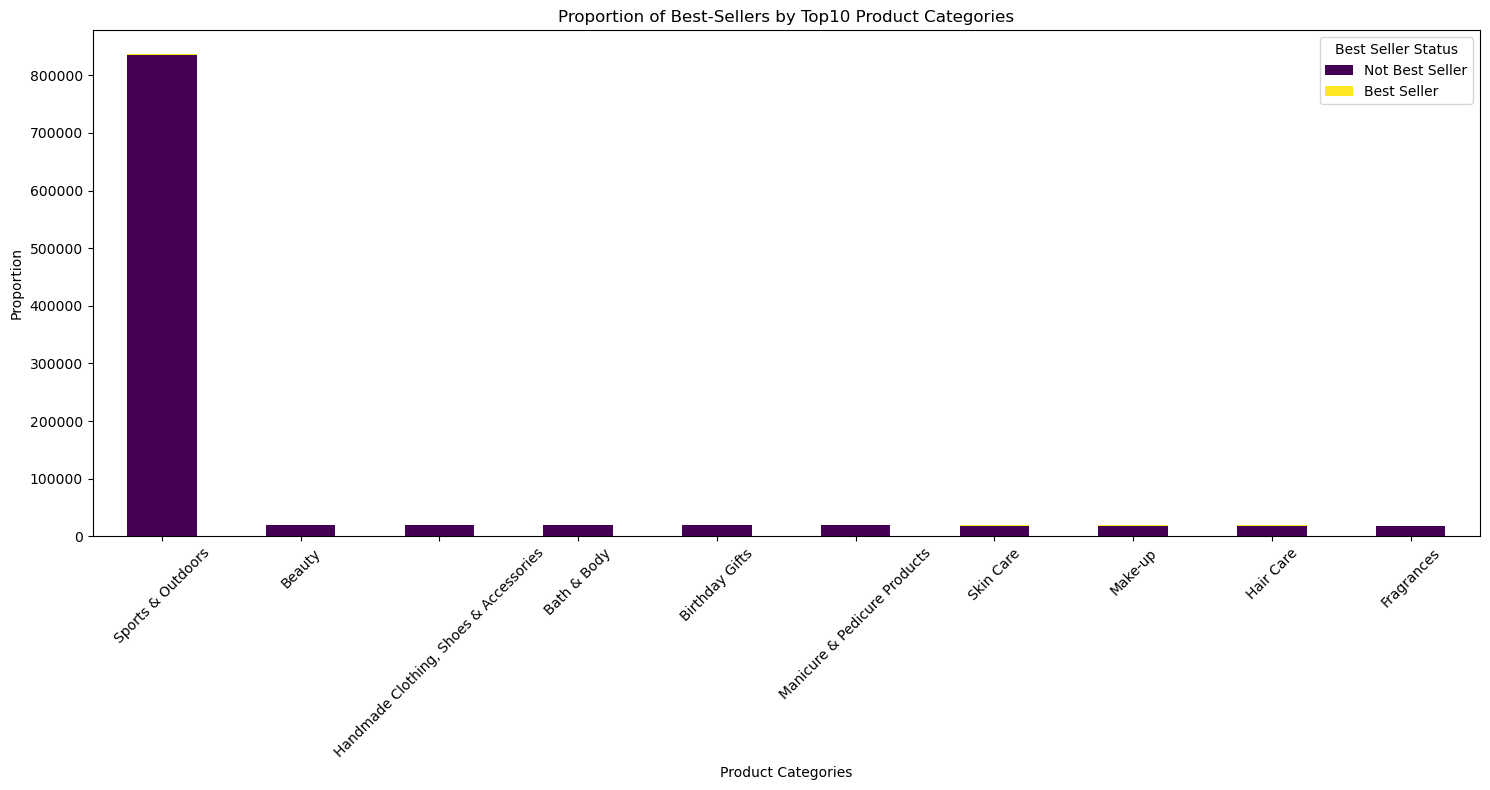

In [44]:
cat_best.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    colormap='viridis'
)

plt.title('Proportion of Best-Sellers by Top10 Product Categories')
plt.ylabel('Proportion')
plt.xlabel('Product Categories')
plt.legend(title='Best Seller Status', labels=['Not Best Seller', 'Best Seller'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

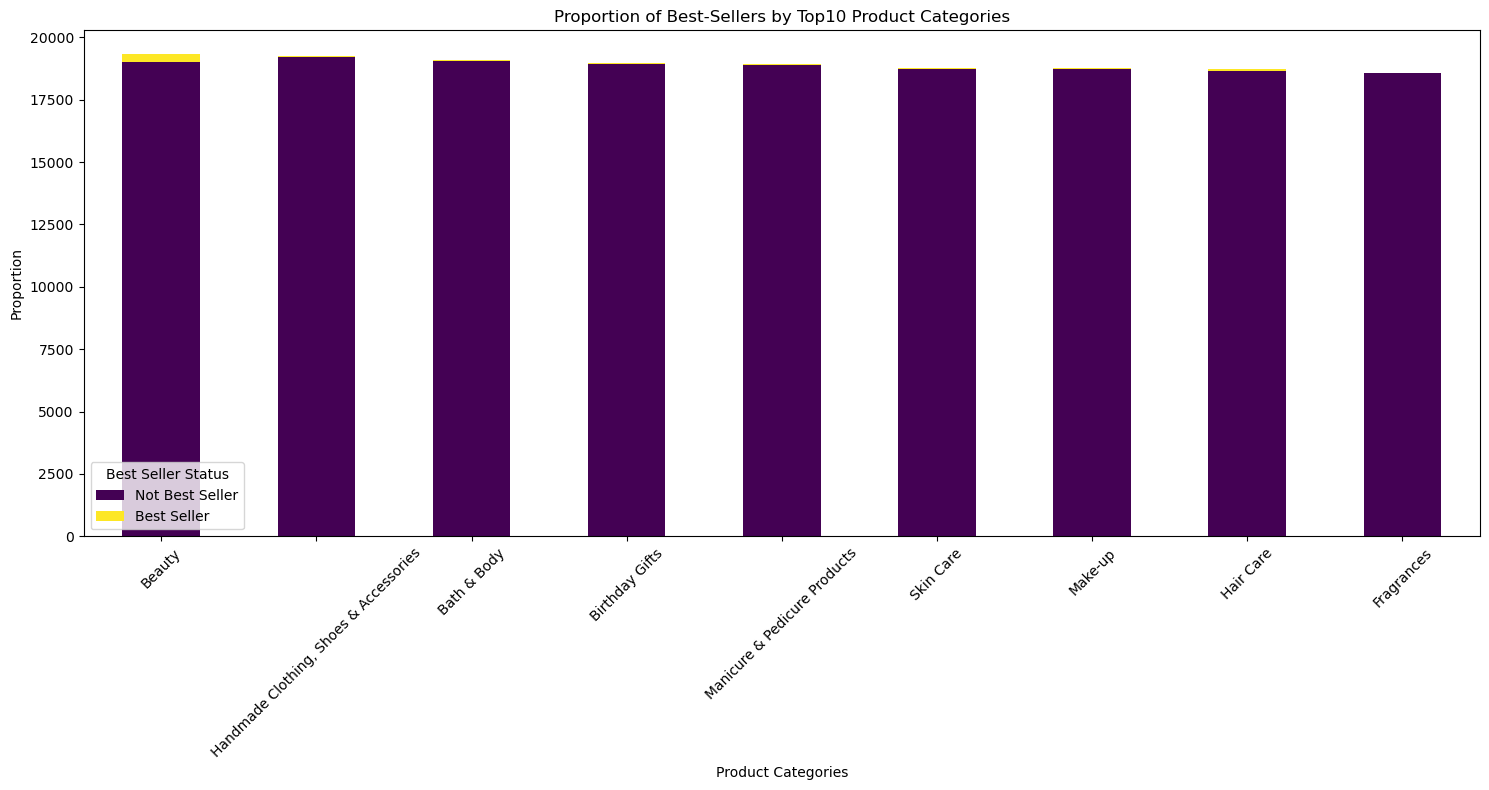

In [46]:
cat_best.loc["Beauty":].plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    colormap='viridis'
)

plt.title('Proportion of Best-Sellers by Top10 Product Categories')
plt.ylabel('Proportion')
plt.xlabel('Product Categories')
plt.legend(title='Best Seller Status', labels=['Not Best Seller', 'Best Seller'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

At least for our Top10 categories (selected by descending order of total number of products), the proportion of best-selling products is very small. This seems to be a repeating trend accross categories.

I want to visualize the top 10 categories where being a best-selles is more prevalent:

In [50]:
top_best = proportion_best_seller.head(10).index
top_best

Index(['Grocery', 'Smart Home Security & Lighting', 'Health & Personal Care',
       'Mobile Phone Accessories', 'Power & Hand Tools',
       'Billiard, Snooker & Pool', 'Pet Supplies',
       'Home Brewing & Wine Making', 'Wind Instruments', 'Mirrors'],
      dtype='object', name='category')

In [52]:
cat_best2 = cross_cat_best.loc[cross_cat_best.index.isin(top_best)]
cat_best2

isBestSeller,False,True,total
category,,,
"Billiard, Snooker & Pool",241,8,249
Grocery,9008,556,9564
Health & Personal Care,9017,552,9569
Home Brewing & Wine Making,239,7,246
Mirrors,243,7,250
Mobile Phone Accessories,248,11,259
Pet Supplies,9152,285,9437
Power & Hand Tools,8353,306,8659
Smart Home Security & Lighting,98,6,104


In [54]:
cat_best2_sort = cat_best2.sort_values(by='total', ascending=False)
cat_best2_sort

isBestSeller,False,True,total
category,,,
Health & Personal Care,9017,552,9569
Grocery,9008,556,9564
Pet Supplies,9152,285,9437
Power & Hand Tools,8353,306,8659
Mobile Phone Accessories,248,11,259
Mirrors,243,7,250
Wind Instruments,243,7,250
"Billiard, Snooker & Pool",241,8,249
Home Brewing & Wine Making,239,7,246


In [56]:
cat_best3 = cat_best2_sort[[0,1]]
cat_best3

isBestSeller,False,True
category,,
Health & Personal Care,9017,552
Grocery,9008,556
Pet Supplies,9152,285
Power & Hand Tools,8353,306
Mobile Phone Accessories,248,11
Mirrors,243,7
Wind Instruments,243,7
"Billiard, Snooker & Pool",241,8
Home Brewing & Wine Making,239,7


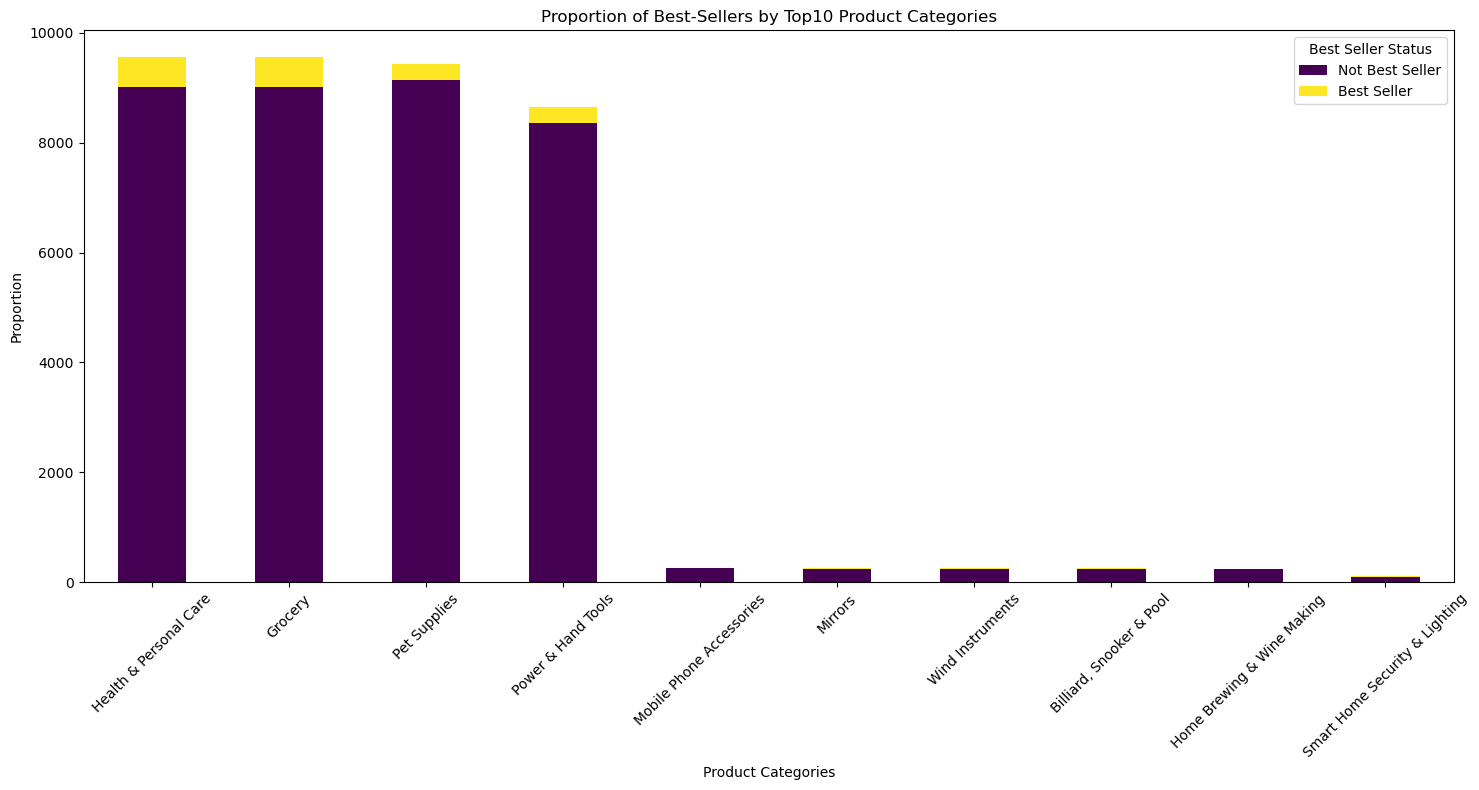

In [58]:
cat_best3.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    colormap='viridis'
)

plt.title('Proportion of Best-Sellers by Top10 Product Categories')
plt.ylabel('Proportion')
plt.xlabel('Product Categories')
plt.legend(title='Best Seller Status', labels=['Not Best Seller', 'Best Seller'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

If we visualize the proportion of best sellers for the categories where this proportion is higher, we can still see that best sellers are rare.

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

## Objective:

Investigate how different product categories influence product prices.

### 0. Preliminary Step: Remove outliers in product prices:

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
_
Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do th._s.

In [65]:
def outlier_slayer(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [67]:
outliers = outlier_slayer(df.price)

In [69]:
outliers.shape

(327688,)

In [71]:
df.price.shape

(2443651,)

In [73]:
df_cleaned = df[df.price.isin(outliers) != True]

In [75]:
df_cleaned.shape

(2115963, 9)

In [77]:
df_cleaned.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


### 1. Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.- 
Which product category tends to have the highest median price? Don't filter here by top categories


In [81]:
top_20_categories = df_cleaned['category'].value_counts().head(20).index
df_top_20 = df_cleaned[df_cleaned['category'].isin(top_20_categories)]

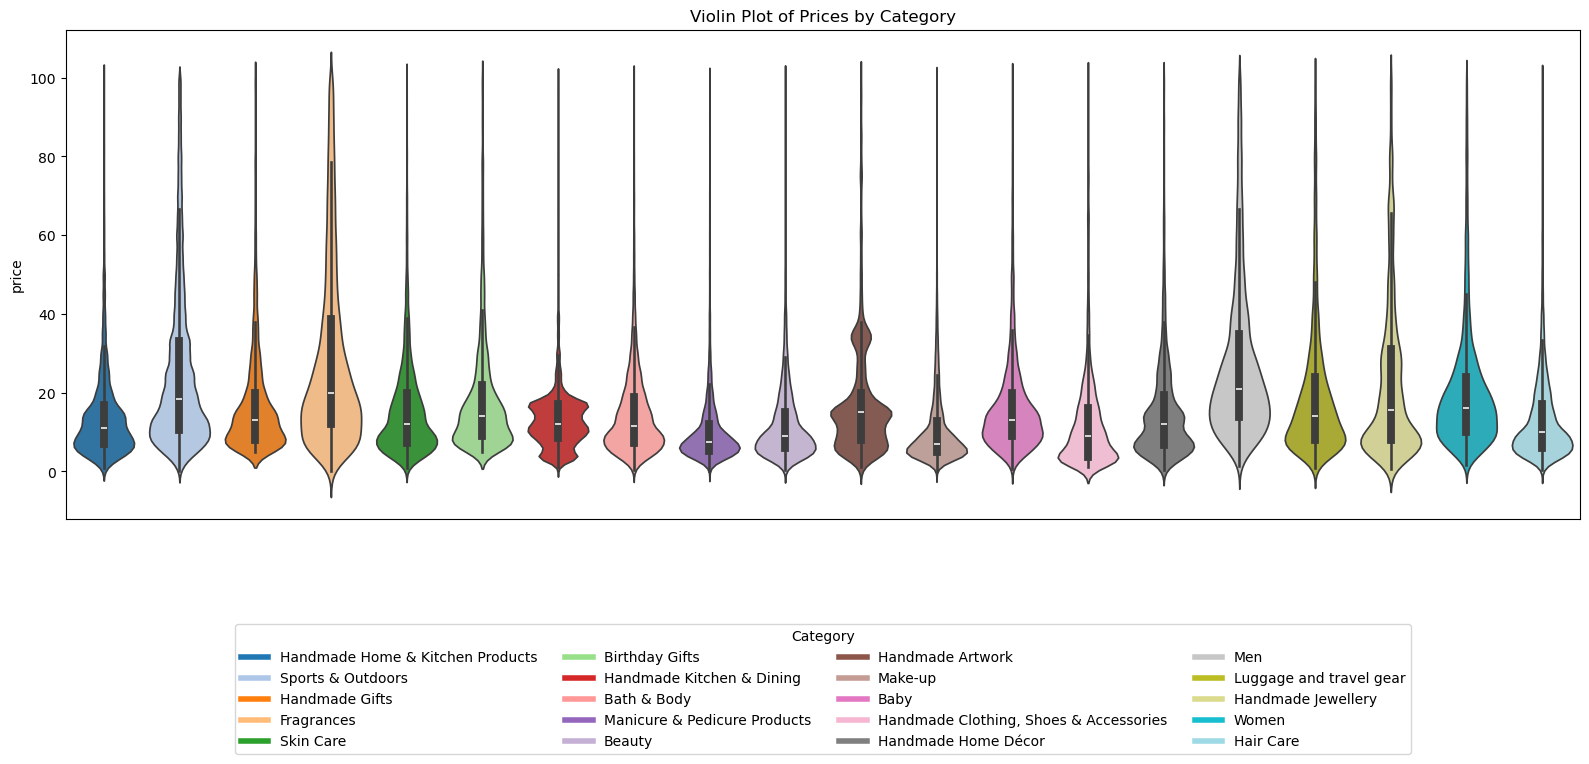

In [83]:
plt.figure(figsize=(16, 8))
palette = sns.color_palette("tab20", n_colors=20)
sns.violinplot(data=df_top_20, x="category", y="price", palette=palette, hue = "category")
plt.xlabel('')
plt.xticks([])
handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(df_top_20['category'].unique()))]
labels = df_top_20['category'].unique()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, title="Category")

plt.title("Violin Plot of Prices by Category")

plt.tight_layout()
plt.show()

In [84]:
median_prices = df_cleaned.groupby('category')['price'].median()
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()
print(f"The product category with the highest median price ({highest_median_price}) is {highest_median_price_category}.")

The product category with the highest median price (74.0) is Desktop PCs.


In [85]:
highest_median_price_category in top_20_categories

False

### 2. Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).- 
Which product category commands the highest average price? Don't filter here by top categories.

In [91]:
top_10_categories = df_cleaned['category'].value_counts().head(10).index

In [93]:
df_top_10 = df[df['category'].isin(top_10_categories)]

In [95]:
avg_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

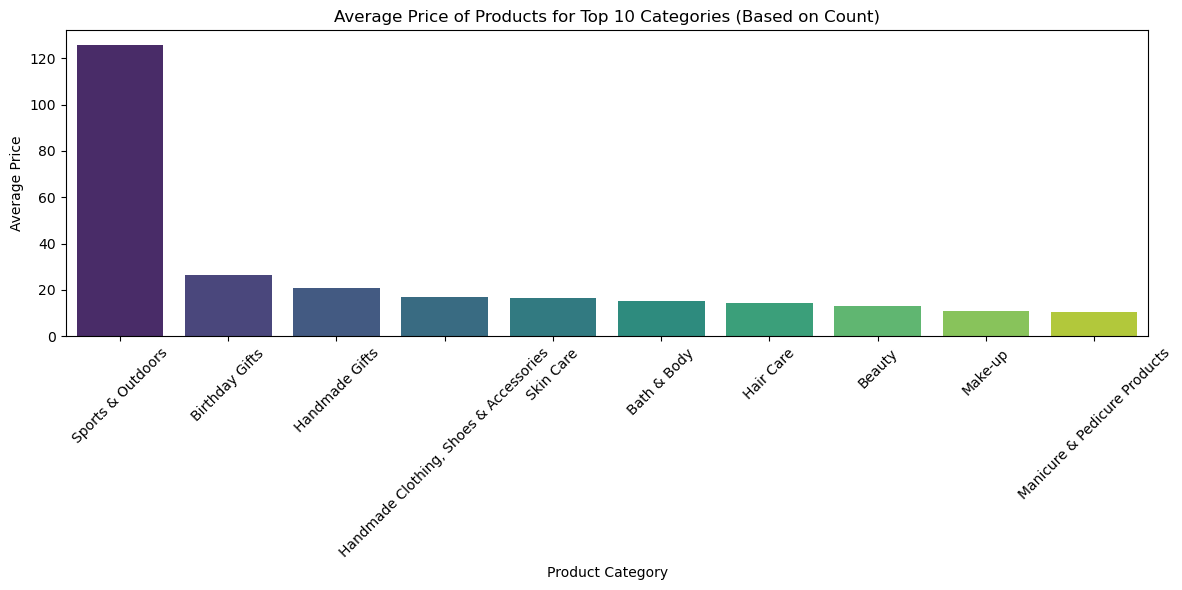

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis", hue = avg_prices.index)
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price of Products for Top 10 Categories (Based on Count)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [99]:
avg_prices = df_cleaned.groupby('category')['price'].mean()
highest_avg_price_category = avg_prices.idxmax()
highest_avg_price = avg_prices.max()
print(f"The product category with the highest average price ({highest_avg_price:.4f}) is {highest_avg_price_category}.")

The product category with the highest average price (68.7724) is Motherboards.


In [101]:
highest_avg_price_category in top_10_categories

False

In [103]:
df_top_10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


### 3. Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

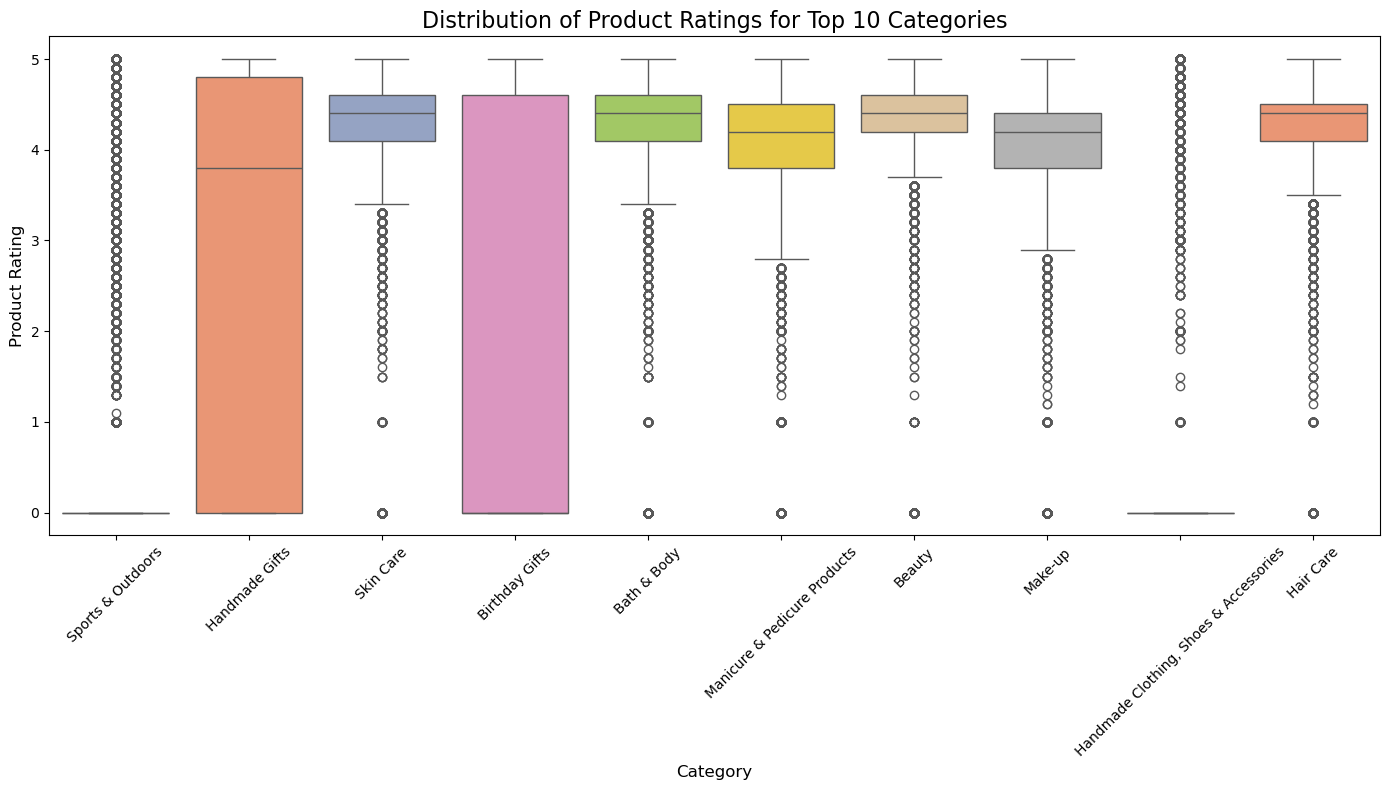

In [107]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_10, x='category', y='stars', palette="Set2", hue = 'category')

plt.title("Distribution of Product Ratings for Top 10 Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Product Rating", fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [108]:
median_rating = df_cleaned.groupby('category')['stars'].median()
highest_median_rating_category = median_rating.idxmax()
highest_median_rating = median_rating.max()
print(f"The product category with the highest median rating from customers ({highest_median_rating}) is {highest_median_rating_category}.")

The product category with the highest median rating from customers (4.7) is Computer Memory.


In [109]:
highest_median_rating_category in top_10_categories

False

# Part 3: Investigating the Interplay Between Product Prices and Ratings

## Objective:

Analyze how product ratings (stars) correlate with product prices.

### 1. Correlation Coefficients:

- Calculate the correlation coefficient between price and stars.- 
Is there a significant correlation between product price and its rating?

In [117]:
correlation = round(float(df_cleaned["price"].corr(df_cleaned["stars"], method="pearson")), 4)

In [119]:
print(correlation)

-0.0777


This coefficient indicates a moderate negative correlation between product price and its rating.

### 2. Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?- 
Use a correlation heatmap to visualize correlations between all numerical variables.- 
Examine if product prices typically follow a normal distribution using a QQ plo
  t.

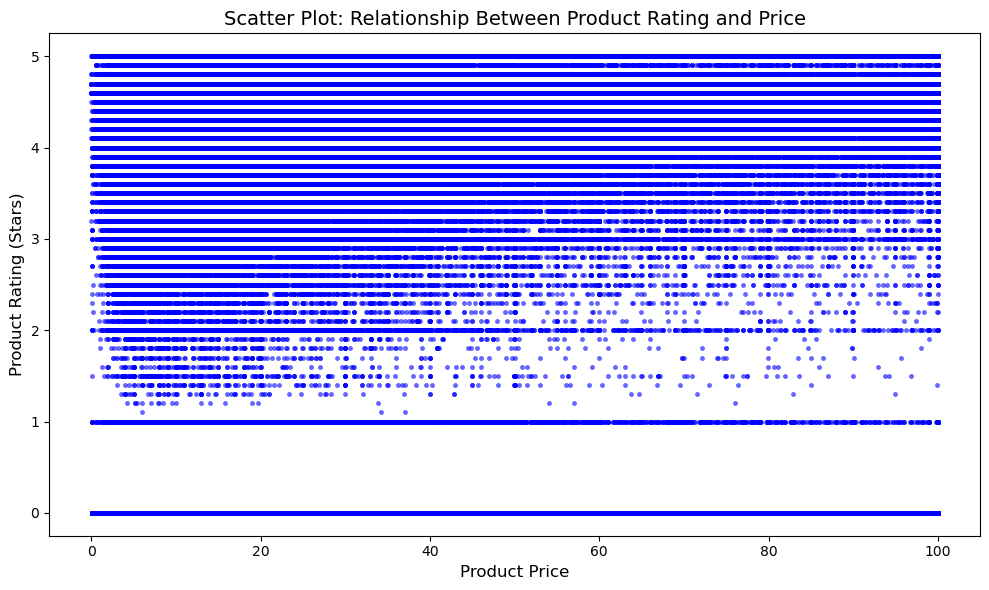

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='price', y='stars', alpha=0.6, color='blue', edgecolor=None, s=10)
plt.xlabel("Product Price", fontsize=12)
plt.ylabel("Product Rating (Stars)", fontsize=12)
plt.title("Scatter Plot: Relationship Between Product Rating and Price", fontsize=14)
plt.tight_layout()
plt.show()

It is not very clear with this plot. Maybe we should use less data.

In [127]:
num_df = df_cleaned.select_dtypes(include="number")

In [129]:
correlation_matrix = num_df.corr()
correlation_matrix

,uid,stars,reviews,price,boughtInLastMonth
uid,1.000000,0.030288,0.020236,0.001717,0.017116
stars,0.030288,1.000000,0.083920,-0.077673,0.113994
reviews,0.020236,0.083920,1.000000,-0.008498,0.105624
price,0.001717,-0.077673,-0.008498,1.000000,-0.059051
boughtInLastMonth,0.017116,0.113994,0.105624,-0.059051,1.000000


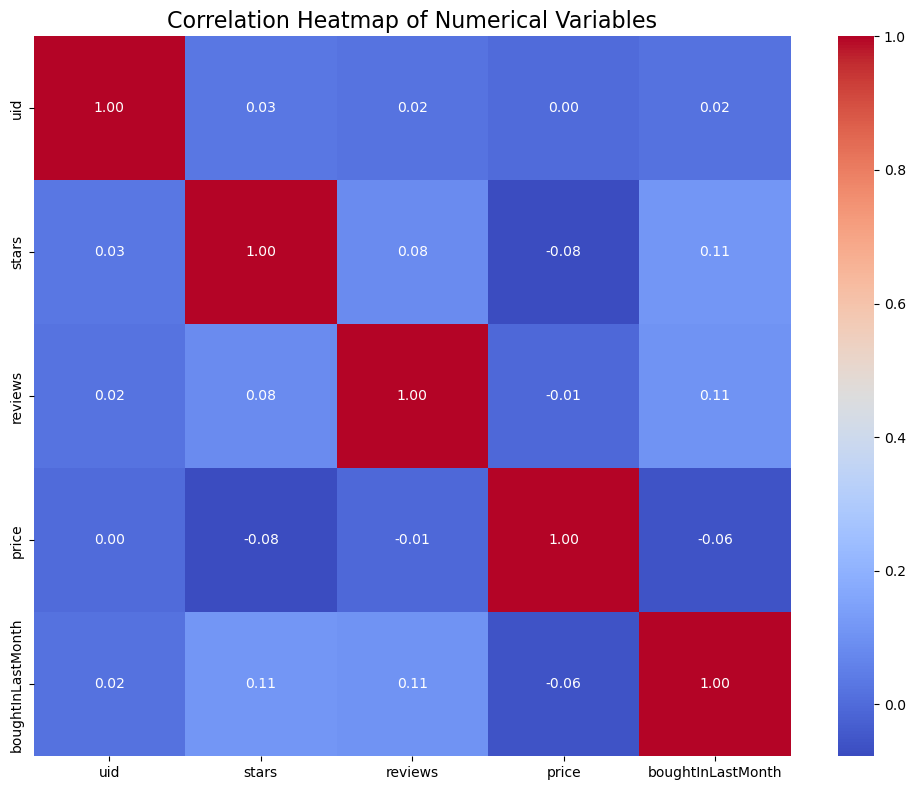

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)

plt.tight_layout()
plt.show()

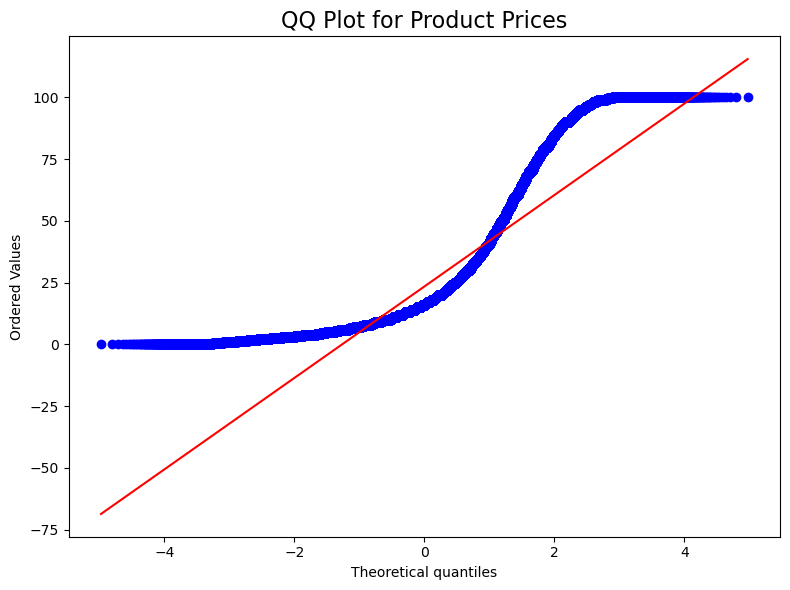

In [133]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(df_cleaned['price'], dist="norm", plot=plt)

plt.title("QQ Plot for Product Prices", fontsize=16)

plt.tight_layout()
plt.show()

According to the QQ plot, product prices don't follow a normal distribution.